# **Predictive model to aid in buying or selling a used car**



# **Project Motivation**

There are several important steps involved when buying or selling a used car. One of the first steps when deciding to buy or sell a used car is to determine its price. Whether you are the buyer or the seller, you want to make sure the car is priced fairly. Though there are many factors that can influence the price of a car, [most tools available](https://www.edmunds.com/car-buying/10-steps-to-buying-a-used-car.html) only provide you with the average selling price of similar vehicles in your area. 

**An initial assessment of a vehicle's price using a machine learning model could help both the buyer and the seller when negotiating the final price, leading to a more efficient process for both parties**. This can help reduce the guesswork and uncertainty when it comes time to buy or sell. This project aims to create a model, trained on features obtained from the BMW used car sales dataset, that can make predictions on new data to estimate the price of used cars in the future.


# **The Dataset**

The dataset of BMW used car sales selected for this project can be obtained from the [DataCamp careerhub-data repository](https://github.com/datacamp/careerhub-data/tree/master/BMW%20Used%20Car%20Sales) on GitHub. This dataset consists of eight features corresponding to the characteristics of a car and a continuous target variable labeled price. The task of this project is to predict the price of a car given these eight features.

## Data Description

The data consists of eight feature variables and one and target variable. The feature variables include model, year, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size. The target variable is price. The tax feature is not as important as the other features in the dataset for predicting the price of a vehicle. This feature will be dropped from the dataset before the model is built.

### Attribute Information



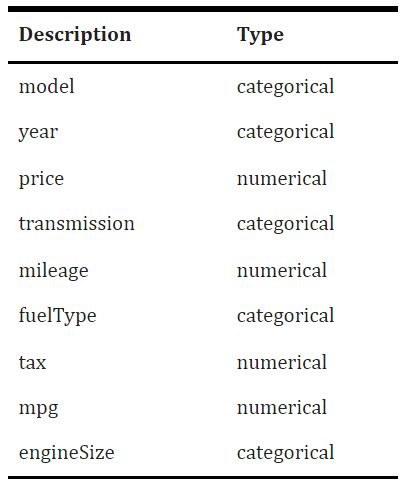

# **Analysis Plan**


Since the target is a continuous variable, this is a supervised regression problem. With the BMW used car sales dataset, each row represents a specific used BMW car and each column represents a particular metric, like the miles per gallon (mpg) and mileage of a vehicle. The aim of supervised learning is to build a model that is able to predict the target variable, given the feature variables, which is the price and the specified performance metrics in this case.


The project will be conducted in the following steps:

*   Identify suitable performance metrics based on what is known about the problem.
*   Exploratory data analysis to identify data problems and discover any initial insights.  
*   Select a suitable algorithm based on the information gained during exploratory analysis.
*   Build, fit, and evaluate a model.
*   Discussion of the model's performance.








# **Performance Metrics**


**Root Mean Square Error (RMSE)**

RMSE is a popular method for evaluating the performance of a regression model. RMSE is computed by taking the difference between the actual and the predicted values for what you are trying to predict. RMSE is always non-negative, and a value of zero would indicate a perfect fit to the data. In general, a lower RMSE is better than a higher one.

**Mean Absolute Error (MAE)**

MAE simply sums the absolute differences between predicted and actual values across all of the samples that the model is built on. Although MAE isn't affected by large differences as much as RMSE, it is less frequently used as an evaluation metric.


# **Exploratory Data Analysis**


In this section, an initial exploratory analysis of the dataset will be done. The dataset will be evaluated for any data quality problems that have to be resolved.

In [1]:
# Import modules needed exploratory analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
colors = ['#328AB6', '#F8F8F8']
customPalette =  sns.set_palette(sns.color_palette(colors))
sns.set_theme(context='notebook', style='whitegrid')

In [2]:
# Read in the 'csv' file , strip the whitespace from the model column, and print the first five rows
bmw = pd.read_csv('https://raw.githubusercontent.com/datacamp/careerhub-data/master/BMW%20Used%20Car%20Sales/bmw.csv')
bmw.model = bmw.model.str.strip()
print(bmw.head())

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0  5 Series  2014  11200    Automatic    67068   Diesel  125  57.6         2.0
1  6 Series  2018  27000    Automatic    14827   Petrol  145  42.8         2.0
2  5 Series  2016  16000    Automatic    62794   Diesel  160  51.4         3.0
3  1 Series  2017  12750    Automatic    26676   Diesel  145  72.4         1.5
4  7 Series  2014  14500    Automatic    39554   Diesel  160  50.4         3.0


In [ ]:
# Print summary statistics
bmw_description = bmw.describe()
print(bmw_description)

print("\n")

# Check the automatically assigned data types
bmw_info = bmw.info()
print(bmw_info)

print("\n")

               year          price  ...           mpg    engineSize
count  10781.000000   10781.000000  ...  10781.000000  10781.000000
mean    2017.078935   22733.408867  ...     56.399035      2.167767
std        2.349038   11415.528189  ...     31.336958      0.552054
min     1996.000000    1200.000000  ...      5.500000      0.000000
25%     2016.000000   14950.000000  ...     45.600000      2.000000
50%     2017.000000   20462.000000  ...     53.300000      2.000000
75%     2019.000000   27940.000000  ...     62.800000      2.000000
max     2020.000000  123456.000000  ...    470.800000      6.600000

[8 rows x 6 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object

The dataset contains three categorical variables that are of the 'object' data type, four continuous variables that are of the 'int64' data type, and two continuous variables that are of the 'float64' data type.

In [ ]:
# Check for missing values
print("Count of missing values in each column of the dataset:")
bmw.isna().sum()

Count of missing values in each column of the dataset:


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

There are no missing values in the dataset.

In [ ]:
# Determine the number of observations in the dataset
bmw.shape

(10781, 9)

The dataset contains 9 columns and 10,781 rows.

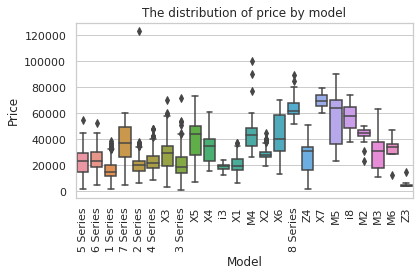

In [ ]:
# Create a boxplot of the price for each model
sns.boxplot(data=bmw, x='model', y='price', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Model')
plt.title('The distribution of price by model')
plt.tight_layout()
plt.savefig('price_boxplot.png')
plt.show()

This plot shows the distribution of price across all models of BMW in the dataset.

## **Numerical Features**

In this section, the four numerical features in the dataset will be explored. The tax feature has been excluded as it will not be an input for the model.

### **Price**

In [ ]:
# Get summary statistics for the 'price' target variable
bmw['price'].describe()

count     10781.000000
mean      22733.408867
std       11415.528189
min        1200.000000
25%       14950.000000
50%       20462.000000
75%       27940.000000
max      123456.000000
Name: price, dtype: float64

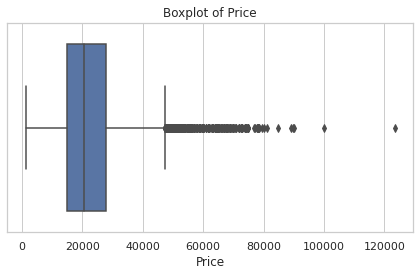

In [ ]:
# Create a boxplot to visualize the distribution of the 'price' target variable
sns.boxplot(data=bmw, x='price', palette=customPalette)
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.tight_layout()
plt.show()

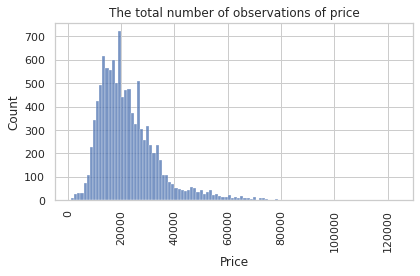

In [ ]:
# Determine the number of unique values of the 'price' target variable
bmw['price'].value_counts().sort_index()
# Create a barplot of the feature
sns.histplot(data=bmw, x='price', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title("The total number of observations of price")
plt.tight_layout()
plt.savefig('price_histplot.png')
plt.show()

### **Year**

In [4]:
# Get summary statistics for the 'year' feature
bmw['year'].describe()

count    10781.000000
mean      2017.078935
std          2.349038
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64

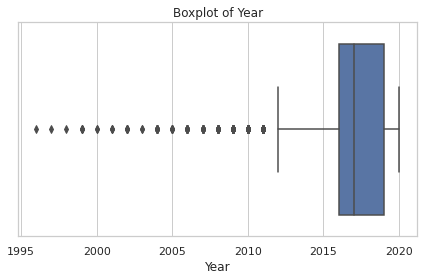

In [3]:
# Create a boxplot to visualize the distribution of the 'year' feature
sns.boxplot(data=bmw, x='year', palette=customPalette)
plt.xlabel('Year')
plt.title('Boxplot of Year')
plt.tight_layout()
plt.show()

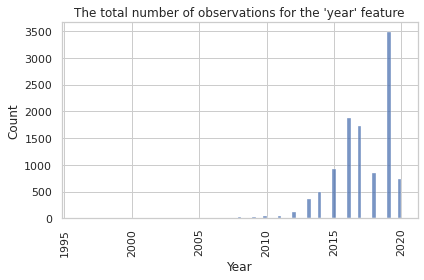

In [ ]:
# Determine the number of unique values of the 'year' feature
bmw['year'].value_counts().sort_index()
# Create a barplot of the feature
sns.histplot(data=bmw, x='year', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Year')
plt.title("The total number of observations for the 'year' feature")
plt.tight_layout()
plt.savefig('year_histplot.png')
plt.show()

### **Mileage**

In [ ]:
# Get summary statistics for the 'mileage' feature
bmw['mileage'].describe()

count     10781.000000
mean      25496.986550
std       25143.192559
min           1.000000
25%        5529.000000
50%       18347.000000
75%       38206.000000
max      214000.000000
Name: mileage, dtype: float64

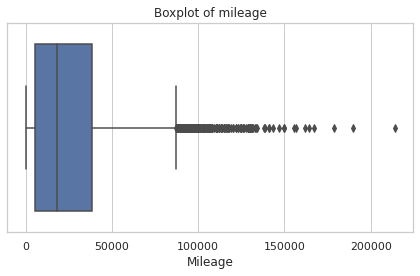

In [ ]:
# Create a boxplot to visualize the distribution of the 'mileage' feature
sns.boxplot(data=bmw, x='mileage', palette=customPalette)
plt.xlabel('Mileage')
plt.title('Boxplot of mileage')
plt.tight_layout()
plt.show()

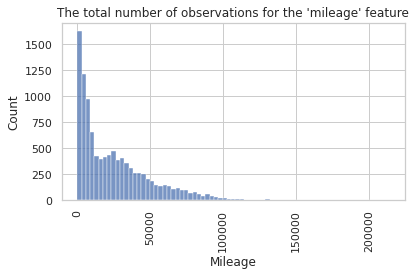

In [ ]:
# Determine the number of unique values for the 'mpg' feature.
bmw['mileage'].value_counts().sort_index()
# Create a barplot of the feature
sns.histplot(data=bmw, x='mileage', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Mileage')
plt.title("The total number of observations for the 'mileage' feature")
plt.tight_layout()
plt.savefig('mileage_histplot.png')
plt.show()

### **Miles Per Gallon (MPG)**

In [ ]:
# Get summary statistics for the 'mpg' feature
bmw['mpg'].describe()

count    10781.000000
mean        56.399035
std         31.336958
min          5.500000
25%         45.600000
50%         53.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64

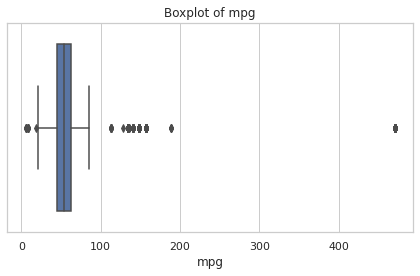

In [ ]:
# Create a boxplot to visualize the distribution of the 'mpg' feature
sns.boxplot(data=bmw, x='mpg', palette=customPalette)
plt.title('Boxplot of mpg')
plt.xlabel('mpg')
plt.tight_layout()
plt.show()

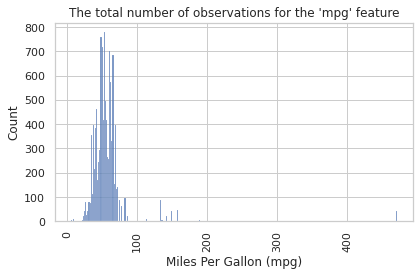

In [ ]:
# Determine the number of unique values for the 'mpg' feature.
bmw['mpg'].value_counts().sort_index()
# Create a barplot of the feature
sns.histplot(data=bmw, x='mpg', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Miles Per Gallon (mpg)')
plt.title("The total number of observations for the 'mpg' feature")
plt.tight_layout()
plt.savefig('mpg_histplot.png')
plt.show()

Based on the results of the plots above, there are outliers for the each of the price, mileage, and mpg values. The outliers from these features will be removed from the dataset before the model development begins.

## **Categorical Features**


In this section, the three categorical features in the dataset will be explored.

### **Model**

In [ ]:
# Get the value counts for each model of BMW, sorted in descending order
bmw['model'].value_counts().sort_values(ascending=False)

3 Series    2443
1 Series    1969
2 Series    1229
5 Series    1056
4 Series     995
X1           804
X3           551
X5           468
X2           288
X4           179
M4           125
6 Series     108
Z4           108
7 Series     106
X6           106
X7            55
i3            43
8 Series      39
M5            29
M3            27
M2            21
i8            17
M6             8
Z3             7
Name: model, dtype: int64

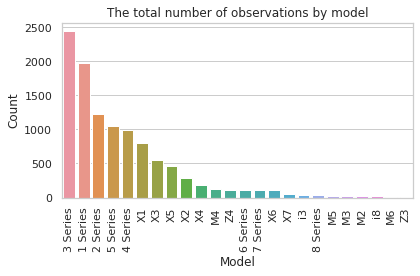

In [ ]:
# Create a barplot of the number of observations per model
sns.countplot(data=bmw, x='model', palette=customPalette, order = bmw['model'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Model')
plt.title('The total number of observations by model')
plt.tight_layout()
plt.savefig('model_countplot.png')
plt.show()

### **Fuel Type**

In [ ]:
# Get the value counts for each fuel type, sorted in descending order
bmw['fuelType'].value_counts().sort_values(ascending=False)

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

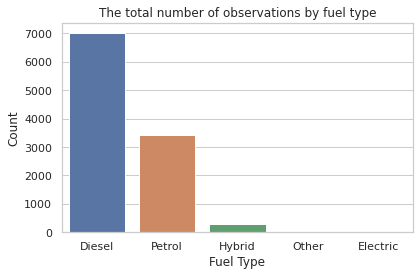

In [ ]:
# Create a barplot of the number of observations by fuel type
sns.countplot(data=bmw, x='fuelType', palette=customPalette, order = bmw['fuelType'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Fuel Type')
plt.title('The total number of observations by fuel type')
plt.tight_layout()
plt.savefig('fuel_type_countplot.png')
plt.show()

The fuelType "Other" should be investigated futher.

In [ ]:
# Determine which observations contain a 'fuelType' of "Other"
bmw[bmw['fuelType'] == "Other"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5
86,2 Series,2017,16000,Automatic,32389,Other,0,141.2,1.5
118,X5,2016,21000,Automatic,71626,Other,0,85.6,2.0
138,3 Series,2017,17950,Automatic,43703,Other,140,134.5,2.0
152,3 Series,2017,17000,Automatic,31501,Other,0,134.5,2.0
7456,3 Series,2016,17500,Automatic,48000,Other,0,134.5,2.0
8144,5 Series,2018,21940,Automatic,53519,Other,135,156.9,2.0
8188,i3,2015,14940,Automatic,59000,Other,0,470.8,0.6


In [ ]:
# Subset the data based on the models in the above table
bmw_2_series = bmw[bmw['model'] == "2 Series"]
bmw_3_series = bmw[bmw['model'] == "3 Series"]
bmw_5_series = bmw[bmw['model'] == "5 Series"]
bmw_i3 = bmw[bmw['model'] == "i3"]
bmw_i8 = bmw[bmw['model'] == "i8"]
bmw_x5 = bmw[bmw['model'] == "X5"]
# Print the fuel types for the selected models
print("Count of fuel type for the BMW 2 Series:")
print(bmw_2_series['fuelType'].value_counts().sort_values(ascending=False))
print("\n")
print("Count of fuel type for the BMW 3 Series:")
print(bmw_3_series['fuelType'].value_counts().sort_values(ascending=False))
print("\n")
print("Count of fuel type for the BMW 5 Series:")
print(bmw_5_series['fuelType'].value_counts().sort_values(ascending=False))
print("\n")
print("Count of fuel type for the BMW i3:")
print(bmw_i3['fuelType'].value_counts().sort_values(ascending=False))
print("\n")
print("Count of fuel type for the BMW i8:")
print(bmw_i8['fuelType'].value_counts().sort_values(ascending=False))
print("\n")
print("Count of fuel type for the BMW X5:")
print(bmw_x5['fuelType'].value_counts().sort_values(ascending=False))
print("\n")

Count of fuel type for the BMW 2 Series:
Petrol    649
Diesel    541
Hybrid     36
Other       3
Name: fuelType, dtype: int64


Count of fuel type for the BMW 3 Series:
Diesel    1764
Petrol     567
Hybrid      91
Other       21
Name: fuelType, dtype: int64


Count of fuel type for the BMW 5 Series:
Diesel    806
Petrol    158
Hybrid     91
Other       1
Name: fuelType, dtype: int64


Count of fuel type for the BMW i3:
Hybrid      33
Other        7
Electric     3
Name: fuelType, dtype: int64


Count of fuel type for the BMW i8:
Hybrid    16
Other      1
Name: fuelType, dtype: int64


Count of fuel type for the BMW X5:
Diesel    409
Petrol     34
Hybrid     22
Other       3
Name: fuelType, dtype: int64




These observations with a fuelType of "Other" will be addressed in the data cleaning step before model development begins.

### **Engine Size (Litres)**

In [ ]:
# Get the value counts for engine size
bmw['engineSize'].value_counts().sort_values(ascending=False)

2.0    6575
3.0    2458
1.5    1463
1.6     109
4.4      79
0.0      47
2.5      14
0.6       7
4.0       6
2.2       6
3.2       5
1.9       5
6.6       2
2.8       2
5.0       1
1.0       1
3.5       1
Name: engineSize, dtype: int64

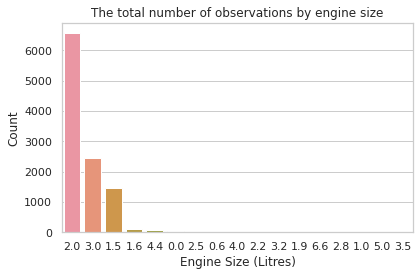

In [ ]:
# Create a barplot of the number of observations by engine size
sns.countplot(data=bmw, x='engineSize', palette=customPalette, order = bmw['engineSize'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Engine Size (Litres)')
plt.title('The total number of observations by engine size')
plt.tight_layout()
plt.savefig('engine_size_countplot.png')
plt.show()

### **Transmission**

In [ ]:
# Get the value counts for each transmission type, sorted in descending order
bmw['transmission'].value_counts().sort_values(ascending=False)

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

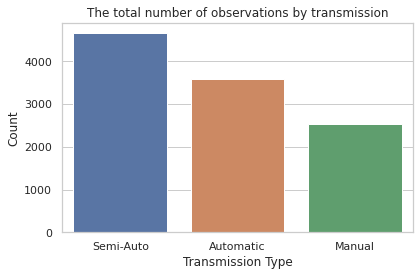

In [ ]:
# Create a barplot of the number of observations by transmission type
sns.countplot(data=bmw, x='transmission', palette=customPalette, order = bmw['transmission'].value_counts().index)
plt.ylabel('Count')
plt.xlabel('Transmission Type')
plt.title('The total number of observations by transmission')
plt.tight_layout()
plt.savefig('transmission_countplot.png')
plt.show()

## **Cleaning Data**

After exploring the data, a few data quality problems have been identified. The 'fuelType' feature has some values which are not consistent with the rest of the dataset. For example, some of the fuelType values for BMW i3 and i8 models are "Other" when the rest are "Hybrid". The values which don't match will be replaced so the fuelType values in these columns are consistent across observations.

In [ ]:
# Replace the fuel type values for the BMW i3 and i8 models
bmw.loc[bmw['model'] == "i3", 'fuelType'] = "Hybrid"
bmw.loc[bmw['model'] == "i8", 'fuelType'] = "Hybrid"

Below are the remaining obervations with a fuel type value of "Other". These values will be removed as the model to which they belong has multiple fuel types listed and it cannot be determined which fuel type to change the "Other" value to.

In [ ]:
# Filter the dataset to show observations with a fuel type of 'Other'
bmw[bmw['fuelType'] == "Other"]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5
86,2 Series,2017,16000,Automatic,32389,Other,0,141.2,1.5
118,X5,2016,21000,Automatic,71626,Other,0,85.6,2.0
138,3 Series,2017,17950,Automatic,43703,Other,140,134.5,2.0
152,3 Series,2017,17000,Automatic,31501,Other,0,134.5,2.0
7456,3 Series,2016,17500,Automatic,48000,Other,0,134.5,2.0
8144,5 Series,2018,21940,Automatic,53519,Other,135,156.9,2.0
8602,3 Series,2017,17000,Automatic,45000,Other,140,134.5,2.0
8745,3 Series,2017,16600,Automatic,50000,Other,0,134.5,2.0


In [ ]:
# Get the value counts for fuel type based on the models in the above table
bmw_other = bmw["model"].isin(["3 Series", "2 Series", "5 Series", "X5"])
bmw_select = bmw[bmw_other]
bmw_select['fuelType'].value_counts().sort_index()

Diesel    3520
Hybrid     240
Other       28
Petrol    1408
Name: fuelType, dtype: int64

28 observations will be removed as it is not clear which fuel type they belong to.

In [ ]:
# Filter the dataset to remove observations with fuel type 'Other'
bmw = bmw[bmw['fuelType'] != "Other"]
bmw.shape

(10753, 9)

### **Removing Outliers**

The last data quality problem that will be addressed is regarding the outliers in the dataset. An outlier of this dataset is defined as a value that is more than 3 standard deviations from the mean.

In [ ]:
# Import the stats package from scipy
from scipy import stats
# Filter columns based on numerical features only
bmw = bmw[(np.abs(stats.zscore(bmw.select_dtypes(exclude='object'))) < 3).all(axis=1)]
# Print shape and summary statistics of dataset with outliers removed
print(bmw.shape)
print(bmw.describe())

(10173, 9)
               year         price  ...           mpg    engineSize
count  10173.000000  10173.000000  ...  10173.000000  10173.000000
mean    2017.226187  22217.050723  ...     54.620889      2.146014
std        1.966254   9657.375610  ...     14.512020      0.486977
min     2011.000000   3076.000000  ...      5.500000      1.500000
25%     2016.000000  14998.000000  ...     47.100000      2.000000
50%     2017.000000  20470.000000  ...     53.300000      2.000000
75%     2019.000000  27480.000000  ...     62.800000      2.000000
max     2020.000000  57000.000000  ...    148.700000      3.000000

[8 rows x 6 columns]


580 rows that contained outliers across the numerical features have been removed from the dataset. The tax feature will be dropped as it will not be an input for the model.

In [ ]:
# Drop the tax column from the dataset
bmw = bmw.drop('tax', axis=1)

scikit-learn requires the features and target values to be in distinct arrays for regression. Therefore, the dataset will be split. In the first line, the target is dropped, and in the second line, only the target is kept.

In [ ]:
# Split the data into features and target
X = bmw.drop('price', axis=1)
y = bmw['price'].values

In [ ]:
# Display the data types of the feature variables
X.dtypes

model            object
year              int64
transmission     object
mileage           int64
fuelType         object
mpg             float64
engineSize      float64
dtype: object

## **Exploratory Data Analysis Summary**

After cleaning the dataset and removing outliers, 10,173 observations are left for model development.

# **Model Development**

Before the type of supervised learning model can be determined, it is important to understand the relationship between the feature variables and the target. Below are two plots that display the relationship between the target, price, and two of the feature variables, mileage, and year.

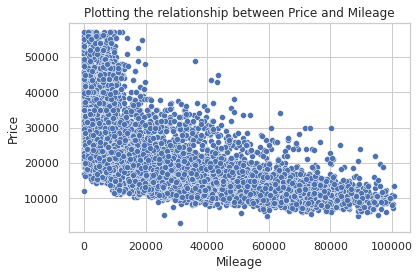

In [ ]:
# Create a scatterplot of price as a function of mileage
sns.scatterplot(data=bmw, x='mileage', y='price', palette=customPalette)
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.title('Plotting the relationship between Price and Mileage')
plt.tight_layout()
plt.savefig('price_vs_mileage.png')
plt.show()

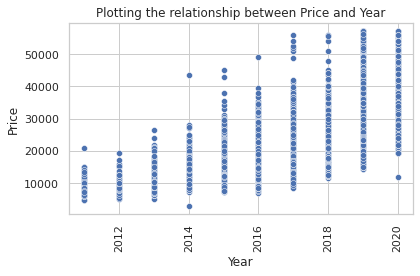

In [ ]:
# Create a scatterplot of the price as a function of year
sns.scatterplot(data=bmw, x='year', y='price', palette=customPalette)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Year')
plt.title('Plotting the relationship between Price and Year')
plt.tight_layout()
plt.savefig('price_vs_year.png')
plt.show()

The plots show that the price changes nonlinearly with year and mileage. This means that models such as linear regression would not be able to capture such a trend. Therefore, a decision tree model is required to solve this regression problem.

A random forest model is an appropriate choice for this problem. A random forest is suitable for a mix of categorical and numerical features.

The RMSE and MAE will be used to evaluate the performance of the regression model. The best model hyperparameters will be determined using grid search cross-validation.

In [ ]:
# Import required packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

## **Preprocessing the data**

There are some essential data preprocessing steps needed before the machine learning model can be built:

*   Convert the non-numeric data into numeric.
*   Split the data into train and test sets.
*   Scale the feature values to a uniform range.

First, all the non-numeric values will be converted into numeric ones using a technique called label encoding. Many machine learning models require the data to be in a strictly numeric format, but this also results in a faster computation.

In [ ]:
# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in X.columns.to_numpy():
    # Compare if the dtype is object
    if X[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        X[col]=le.fit_transform(X[col])

All the non-numeric values have been successfully converted to numeric ones. Now, the data will be split into a train set and test set to prepare the data for two different phases of machine learning modeling: training and testing. 

It is important to split all of the data at the very beginning into a training set and test set, then perform cross-validation on the training set to tune the model's hyperparameters. After this, the best hyperparameters can be selected and used on the test set, which has not been used at all, to test how well the model can be expected to perform on a dataset that it has never seen before.

Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, the data is first split and then the scaling is applied.



In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

The data is now split into two separate sets, the train and test sets respectively. The last preprocessing step of scaling remains before the machine learning model can be fitted to the data. Normalization is performed to prevent features in the dataset with larger scales from influencing the model.


In [ ]:
# Instantiate StandardScaler and use it to rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## **Random Forest Regressor**

Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample that has the same size as the training set.

In [ ]:
# Set seed for reproducibility
SEED = 1
# Instantiate a random forests regressor 'rf' with 400 estimators
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)
# Fit 'rf' to the training set
rf.fit(rescaledX_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(rescaledX_test)

In [ ]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Eavluate the test set mean absolute error
mae_test = MAE(y_test, y_pred)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
# Print the test set MAE
print('Test set MAE of rf: {:.2f}'.format(mae_test))

Test set RMSE of rf: 6218.87
Test set MAE of rf: 4588.85


The result shows that an untuned Random Forrest Model achieves a test set RMSE of 6218.87 and a test set MAE of 4588.85

## **Hyperparameter tuning**

When fitting different values of a hyperparameter, it is essential to use cross-validation. A grid search cross-validation is executed to choose combination of hyperparameters that performed the best. First, the hyperparameters are specified as a dictionary in which the keys are the hyperparameter names.

In [ ]:
# Print out 'rf's hyperparameters
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.12, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In the following, only the n_estimators, max_features, and min_samples_leaf will be optimized.

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [ ]:
# Fit 'grid_rf' to the training set
grid_rf.fit(rescaledX_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=0.12,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=400, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 350}


In [ ]:
# Extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_
# Predict the test set labels
y_pred = best_model.predict(rescaledX_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
# Eavluate the test set mean absolute error
mae_test = MAE(y_test, y_pred)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
# Print the test set MAE
print('Test set MAE of rf: {:.2f}'.format(mae_test))

Test set RMSE of rf: 2173.31
Test set MAE of rf: 1473.65


After optimizing the hyperparameters, the Random Forrest model achieves an RMSE of 2173.31 and a MAE of 1473.65 on the test set, which is much improved over the untuned model.

**Feature Importance**

When a tree based method is trained, the predictive power, or importance, of a feature can be assessed. The importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction.

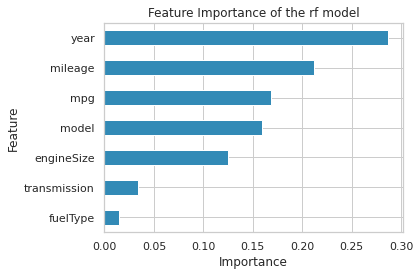

In [ ]:
# Create a pd.Series of features importances
importances_rf = pd.Series(best_model.feature_importances_, index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='#328AB6')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title("Feature Importance of the rf model")
plt.tight_layout()
plt.savefig('fi.png')
plt.show()

The results show, according to the Random Forrest model, that year, mileage, mpg, model, and engine size are the most predictive features.

# **Conclusion**

The project aimed to investigate the potential to develop a model to predict the price of a used car using
features derived from the DataCamp careerhub-data repository on GitHub.

Using the available dataset, a Random Forrest regression model was developed that achieved a root mean square error of **2173.31** and a mean absolute error of **1473.65** on the test set after hyperparameter tuning. 



The results from the model can be used to identify the appropriate price range of a vehicle, which can be helpful in determing a fair sale price for the seller and in [the intial search for a vehicle and subsequent negotiation of the price](https://www.consumer.ftc.gov/articles/buying-used-car-dealer) for the buyer.

The importance of the features was determined using information extracted from a random forest model. The features **year, mileage, mpg, model, and engine size** were determined to be the most predictive. This result can help to data collection more efficient by focussing efforts on these most predictive features.

The limitations with this model derive from the dataset it was trained on. Since the dataset only contains information for BMW vehicles, the model is less reliable when making predicitions on other car brands. For future supervised regression tasks of this nature, it would be beneficial to train the model on a dataset with a variety of car brands.

# **References**

*   [Everything you need to know about buying a used car](https://www.carfax.ca/resource-centre/articles/used-car-buying-guide)
*   [How to Buy a Used Car in 10 Steps](https://www.edmunds.com/car-buying/10-steps-to-buying-a-used-car.html)
*   [Buying a Used Car From a Dealer](https://www.consumer.ftc.gov/articles/buying-used-car-dealer)


